In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Global paths 
DATA_ROOT = "Data"
DATA_TRAIN = os.path.join(DATA_ROOT + os.sep , "train.csv")

In [3]:
# Read data in
def read_data(filepath, delim = ',', n = 1):
    """
    Using genfromtext to read data into a numpy.array.

    :param filepath: string path to data file.
    :param delim: char string for delimiter separating values on a line in data file.
    :param n: number of lines to skip at the beginning of the file.
    """
    return np.genfromtxt(filepath, delimiter=delim, dtype=None, skip_header = n)

In [4]:
train = read_data(DATA_TRAIN, n = 1)

In [5]:
variables = train[::, 1:]
labels = train[:,0]

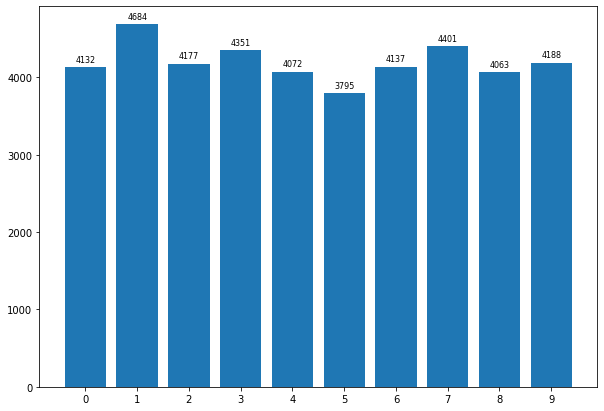

In [45]:
order = np.unique(labels,return_counts=True)
plt.figure(figsize=(10,7))
plt.bar(order[0], order[1])
plt.xticks(np.arange(0, 10, 1))

for i in range(len(order[0])):
     plt.annotate(order[1][i], (i, order[1][i] + 100), ha='center', va='center', size=8)

In [6]:
def plot_digit(data = variables, label = labels, index = 0):
    """
    Plot the handwrite digit with label

    :param data: the pixel of digit
    :param label: the label of digit
    :param index: the index of digit in the data
    """
    plt.imshow(data[index].reshape([28,28]), cmap="gray")
    plt.title("Digit"+str(label[index]), y = -0.2, color = "red")

In [7]:
# split data set into train set and test set
var_train, var_test, label_train, label_test = train_test_split(variables, labels, test_size=0.1, random_state=1)

In [8]:
import seaborn as sn
# Gaussian Native Bayers model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [115]:
model_MNB = MultinomialNB()
fit_MNB = model_MNB.fit(var_train, label_train)

In [116]:
prediction = fit_MNB.predict(var_test)
con_matrix = confusion_matrix(label_test, prediction)

<AxesSubplot:>

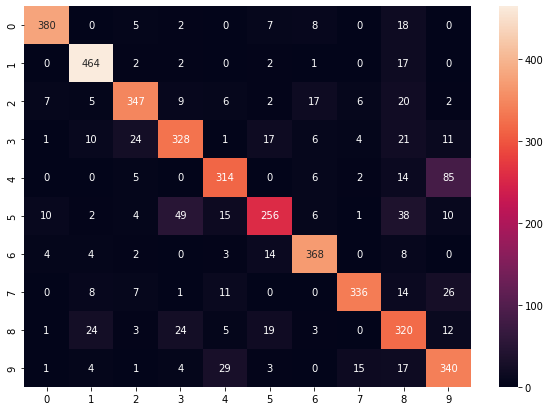

In [117]:
plt.figure(figsize= (10, 7))
sn.heatmap(con_matrix, annot= True, fmt='g')

In [118]:
print("Multinomial Naive Bayes accuracy: {}%".format(accuracy_score(label_test, prediction)*100))

Native accuracy: 82.21428571428572%


In [13]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
model_DT = DecisionTreeClassifier(random_state=1)
DT_fit = model_DT.fit(var_train, label_train)

In [16]:
prediction_DT = DT_fit.predict(var_test)
print("Decision Tree accuracy: {}%".format(accuracy_score(label_test, prediction_DT)))

Decision Tree accuracy: 0.8583333333333333%


In [111]:
def select_depth_DT(trainX, trainy, testX, texty, max_depth = 10):
    """
    plot accuarcy with different max depth of decision tree

    :param trainX: the train data
    :param trainy: the train data labels
    :param testX: the test data
    :param testy: the test data labels
    :param max_depth: the max depth of decision tree
    """

    output = np.zeros(max_depth+1)
    for i in range(1, max_depth+1):
        model = DecisionTreeClassifier(max_depth=i, random_state=1)
        model_fit = model.fit(trainX, trainy)
        prediction = model_fit.predict(testX)
        output[i] = accuracy_score(texty, prediction) * 100
    
    # plot the accuracy result
    plt.figure(figsize=(10, 7))
    plt.plot(output, marker='o', markerfacecolor='red')
    plt.xticks(np.arange(0, len(output), 1))
    plt.yticks(np.arange(0, 100, 10))
    plt.title("Decision Tree Result with different max depth")
    for i, txt in enumerate(output):
        plt.annotate(round(txt, 2), (i+0.5, output[i] - 2), ha='center', va='center', size=8)
    return output


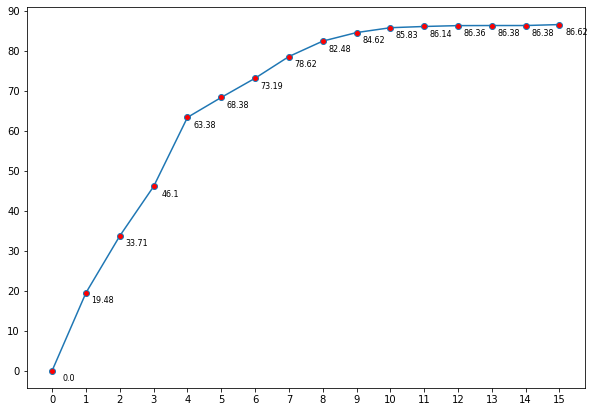

In [112]:
output = select_depth_DT(var_train, label_train, var_test, label_test, 15)

In [9]:
# SVM classifier
from sklearn.svm import SVC


In [10]:
model_SVM_RDF = SVC(kernel= "rbf")
fit_SVM_RDF = model_SVM_RDF.fit(var_train, label_train)

In [11]:
prediction_SVM_RDF = model_SVM_RDF.predict(var_test)
SVM_RDF_matrix = confusion_matrix(label_test, prediction_SVM_RDF)

<AxesSubplot:>

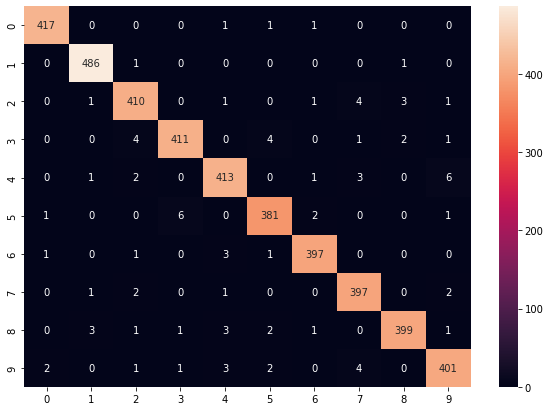

In [12]:
plt.figure(figsize= (10, 7))
sn.heatmap(SVM_RDF_matrix, annot= True, fmt='g')

In [13]:
print("SVM accuracy: {}%".format(accuracy_score(label_test, prediction_SVM_RDF)*100))

SVM accuracy: 97.90476190476191%


In [46]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model_KNN = KNeighborsClassifier(n_neighbors=3)
fit_KNN = model_KNN.fit(var_train, label_train)

In [50]:
prediction_KNN = model_KNN.predict(var_test)
KNN_matrix = confusion_matrix(label_test, prediction_KNN)

<AxesSubplot:>

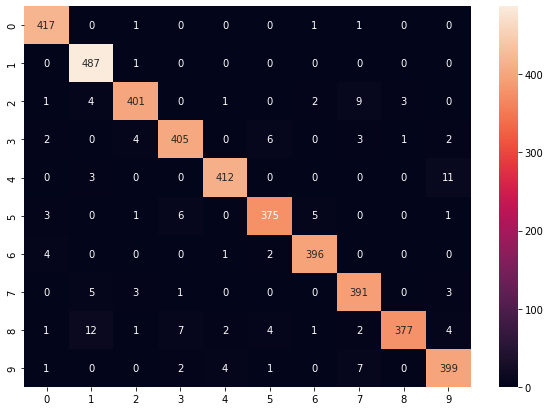

In [51]:
plt.figure(figsize= (10, 7))
sn.heatmap(KNN_matrix, annot= True, fmt='g')

In [49]:
print("K-nearest neighbors accuracy: {}%".format(accuracy_score(label_test, prediction_KNN)*100))

SVM accuracy: 96.66666666666667%


In [57]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools

In [67]:
var_train_CNN = var_train / 255
var_test_CNN = var_test / 255

var_train_CNN = var_train_CNN.reshape(-1,28,28,1)
var_test_CNN = var_test_CNN.reshape(-1,28,28,1)

label_train_CNN = tf.keras.utils.to_categorical(label_train, num_classes=10)
label_test_CNN = tf.keras.utils.to_categorical(label_test, num_classes=10)

In [60]:
# model building
model_CNN = tf.keras.Sequential()

model_CNN.add(layers.Conv2D(filters=32, 
                            kernel_size=(5,5), 
                            padding = 'Same', 
                            activation=tf.nn.relu, 
                            input_shape = (28,28,1)))

model_CNN.add(layers.Conv2D(filters=32, 
                            kernel_size=(5,5), 
                            padding='Same', 
                            activation=tf.nn.relu))

model_CNN.add(layers.MaxPool2D(pool_size=(2,2)))
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Conv2D(filters=64, 
                            kernel_size=(3,3), 
                            padding='Same', 
                            activation=tf.nn.relu, 
                            input_shape = (28,28,1)))
model_CNN.add(layers.Conv2D(filters=64, 
                            kernel_size=(3,3), 
                            padding='Same', 
                            activation=tf.nn.relu))
model_CNN.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(256,activation=tf.nn.relu))
model_CNN.add(layers.Dropout(0.25))
model_CNN.add(layers.Dense(10,activation=tf.nn.softmax))

In [61]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

c:\Users\gq121\Desktop\info521\env\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [62]:
model_CNN.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

In [63]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [71]:
epochs=10
batch_size = 112


In [65]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(var_train_CNN)

In [72]:
# Fit the model
history = model_CNN.fit_generator(datagen.flow(var_train_CNN,label_train_CNN, batch_size=batch_size),
                              epochs = epochs, validation_data = (var_test_CNN,label_test_CNN),
                              verbose = 2, steps_per_epoch=var_train_CNN.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

C:\Users\gq121\AppData\Local\Temp/ipykernel_5720/1387315038.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_CNN.fit_generator(datagen.flow(var_train_CNN,label_train_CNN, batch_size=batch_size),


Epoch 1/10
337/337 - 69s - loss: 0.0430 - accuracy: 0.9891 - val_loss: 0.0278 - val_accuracy: 0.9921 - lr: 0.0010 - 69s/epoch - 203ms/step
Epoch 2/10
337/337 - 66s - loss: 0.0443 - accuracy: 0.9881 - val_loss: 0.0325 - val_accuracy: 0.9917 - lr: 0.0010 - 66s/epoch - 197ms/step
Epoch 3/10
337/337 - 66s - loss: 0.0456 - accuracy: 0.9881 - val_loss: 0.0237 - val_accuracy: 0.9912 - lr: 0.0010 - 66s/epoch - 197ms/step
Epoch 4/10
337/337 - 67s - loss: 0.0469 - accuracy: 0.9882 - val_loss: 0.0314 - val_accuracy: 0.9914 - lr: 0.0010 - 67s/epoch - 198ms/step
Epoch 5/10
337/337 - 66s - loss: 0.0444 - accuracy: 0.9879 - val_loss: 0.0253 - val_accuracy: 0.9933 - lr: 0.0010 - 66s/epoch - 196ms/step
Epoch 6/10
337/337 - 66s - loss: 0.0452 - accuracy: 0.9880 - val_loss: 0.0289 - val_accuracy: 0.9919 - lr: 0.0010 - 66s/epoch - 196ms/step
Epoch 7/10
337/337 - 67s - loss: 0.0452 - accuracy: 0.9884 - val_loss: 0.0251 - val_accuracy: 0.9943 - lr: 0.0010 - 67s/epoch - 198ms/step
Epoch 8/10
337/337 - 66s - 

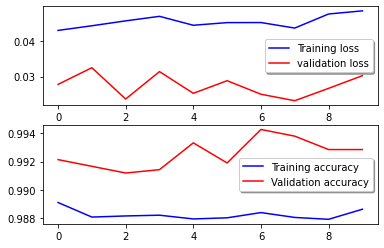

In [73]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

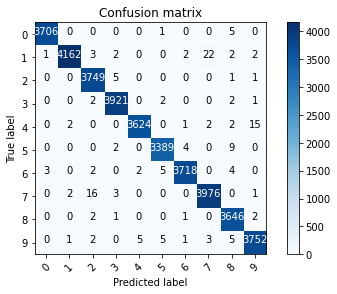

In [70]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_CNN.predict(var_train_CNN)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(label_train_CNN,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 